In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv("CreditRisk.csv")

In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
data.shape

(981, 13)

In [60]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [62]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,956.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,0.881799,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,1.255623,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [64]:
data["Loan_ID"] = LE.fit_transform(data["Loan_ID"])
data["Gender"] = LE.fit_transform(data["Gender"])
data["Married"] = LE.fit_transform(data["Married"])
data["Education"] = LE.fit_transform(data["Education"])
data["Self_Employed"] = LE.fit_transform(data["Self_Employed"])
data["Property_Area"] = LE.fit_transform(data["Property_Area"])
data["Loan_Status"] = LE.fit_transform(data["Loan_Status"])

In [65]:
data.Gender.fillna(0.0, inplace=True)
data.Dependents.fillna(0.0, inplace=True)
data.Self_Employed.fillna(0.0, inplace=True)
data.Credit_History.fillna(0.0, inplace=True)
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int64  
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int64  
 12  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 99.8 KB


In [67]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [68]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [69]:
X = data.drop(columns=["Loan_Status"], axis=1)
y = data["Loan_Status"]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [72]:
from sklearn import metrics

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier(criterion= "entropy")

In [75]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
pred = dtree.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [78]:
dtree_pred = accuracy_score(Y_test, pred)

In [79]:
dtree_proba = dtree.predict_proba(X_test)

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, dtree_proba[:,1])

Text(0.5, 1.0, 'Decision Tree')

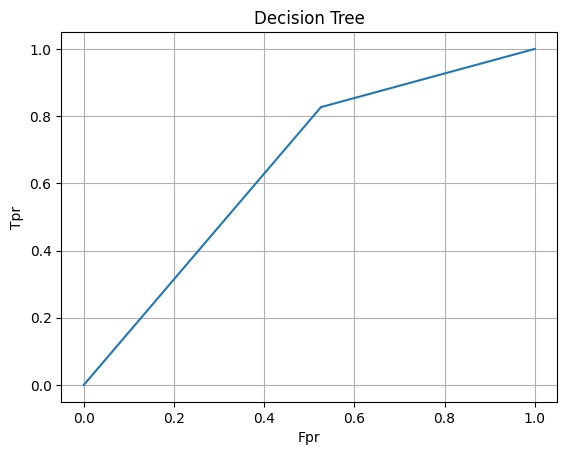

In [81]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Decision Tree")

In [82]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50       116
           1       0.79      0.83      0.81       277

    accuracy                           0.72       393
   macro avg       0.66      0.65      0.66       393
weighted avg       0.71      0.72      0.72       393



In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
pred = knn.predict(X_test)

In [86]:
knn_pred = accuracy_score(Y_test, pred)

Text(0.5, 1.0, 'K Nearest Neigbors')

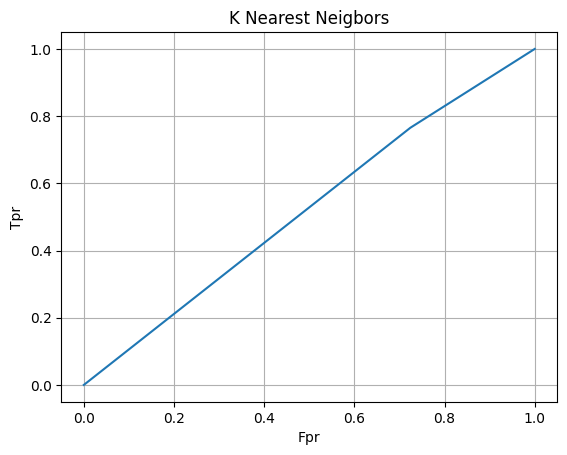

In [87]:
knn_proba = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, knn_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("K Nearest Neigbors")

In [88]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.33      0.28      0.30       116
           1       0.72      0.77      0.74       277

    accuracy                           0.62       393
   macro avg       0.52      0.52      0.52       393
weighted avg       0.60      0.62      0.61       393



In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC(probability = True)
svm.fit(X_train, Y_train)

SVC(probability=True)

In [91]:
pred = svm.predict(X_test)

In [92]:
svc_pred = accuracy_score(Y_test, pred)

Text(0.5, 1.0, 'Support Vector classifier')

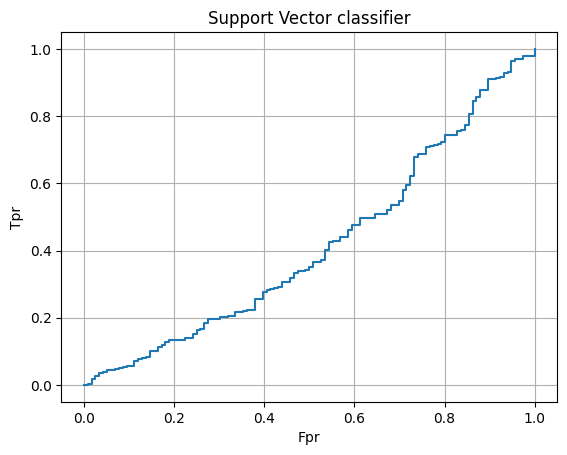

In [93]:
svc_proba = svm.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, svc_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Support Vector classifier")

In [94]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.70      1.00      0.83       277

    accuracy                           0.70       393
   macro avg       0.35      0.50      0.41       393
weighted avg       0.50      0.70      0.58       393



In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [97]:
pred = gnb.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [99]:
gnb_pred = accuracy_score(Y_test, pred)

Text(0.5, 1.0, 'Gaussian Naive Bayes')

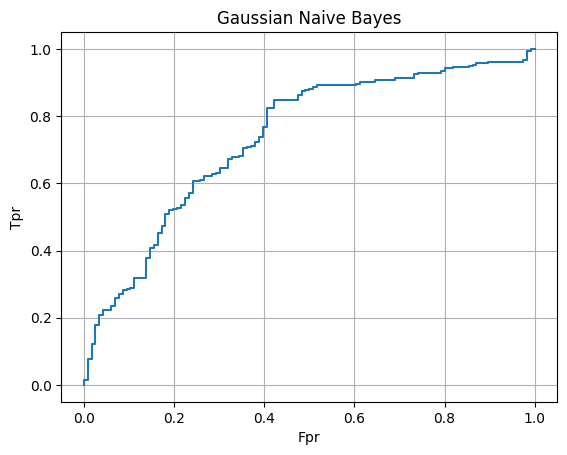

In [100]:
gnb_proba = gnb.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, gnb_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Gaussian Naive Bayes")

In [101]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.56       116
           1       0.81      0.87      0.84       277

    accuracy                           0.76       393
   macro avg       0.71      0.69      0.70       393
weighted avg       0.75      0.76      0.76       393



Comparing the Models

In [102]:
accuracy = [dtree_pred, knn_pred, svc_pred, gnb_pred]

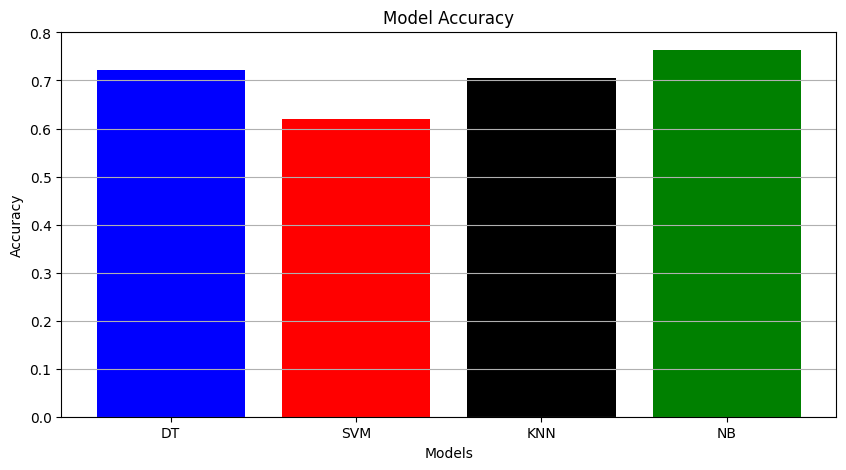

In [103]:
plt.figure(figsize=(10,5))
model =  ["DT", "SVM", "KNN", "NB"]
plt.bar(model, accuracy, color = ("blue", "red", "black", "green"))
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.grid(axis = "y")
plt.show()